# Level 1

Plotting the wavefunction squared times pi r^2 (the radial distribution function)




n l
1 0


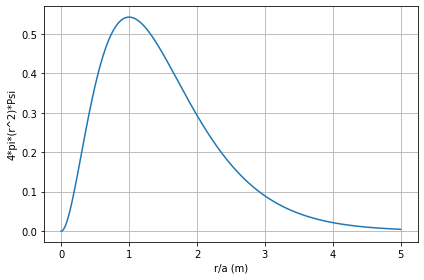

n l
2 0
2 1


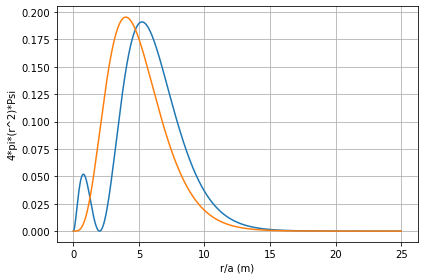

n l
3 0
3 1
3 2


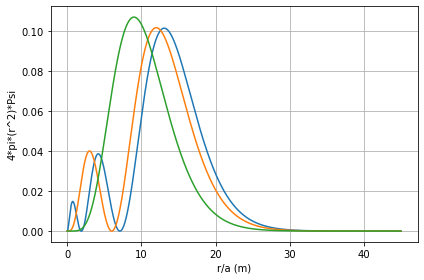

n l
4 0
4 1
4 2
4 3


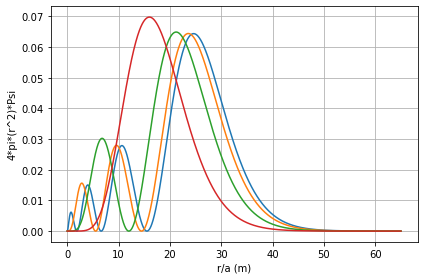

<Figure size 432x288 with 0 Axes>

In [1]:
#Importing neccessary functions for level 1 code
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import genlaguerre
from scipy.integrate import simps

#Defines a0 constant and resolution value
a = 5.29*10**-11
numValues = 20000

def radialWavefunction(n,l,r):
    #Returns the radial wavefunction for each value of r where n is the principle quantum number and l is the angular momentum quantum number.
    y=np.zeros(numValues)
    #Generates an associated laguerre polynomial
    Lag = genlaguerre(n-l-1, 2*l+1)
    #Loops through each power of r in the laguerre polynomial and adds to the total
    for i in range(len(Lag)+1):
        i = float(i)
    #The main equation
        y = y + (((r/(n*a))**(l))*(np.exp(-r/(a*n)))*Lag[int(i)]*(((2*r)/(a*n))**i))
    return y

def normalise(x,y):
    #Calculates integral (area under the graphs) and divides in order to normalise without normalisation constant
    integral = simps(np.absolute(y),x)
    y = y/np.absolute(integral)
    return y

def plotRadialDistribution(r,psi):
    #Combines functions to normalise and plot radial distribution
    radialDistribution = 4*np.pi*(r**2)*psi**2
    radialDistribution = normalise(r, radialDistribution)
    plt.plot(r, radialDistribution)
    plt.grid(True)
    plt.xlabel("r/a (m)")
    plt.ylabel("4*pi*(r^2)*Psi")
    
print("Plotting the wavefunction squared times pi r^2 (the radial distribution function)\n\n")

#Loops through numbers of Psi, plotting a graph for each 'n' and a plot for each 'l'
for numPsi in range(5):
    if numPsi == 0:
        print('\n')
    else:
        print('n','l')
        width = float(((-15)+(numPsi*20))*a)
        for i in range(numPsi):
            n = numPsi
            l = i
            r = np.linspace(0,width, numValues)
            psi = radialWavefunction(n,l,r)
            r = r/a
            psi = normalise(r, psi)
            print(n,l)
            plotRadialDistribution(r,psi)
        plt.tight_layout()
        plt.savefig('PythonProjectLevel1Graph'+str(numPsi))
        plt.show()
        plt.clf()
        
        


# Level 2

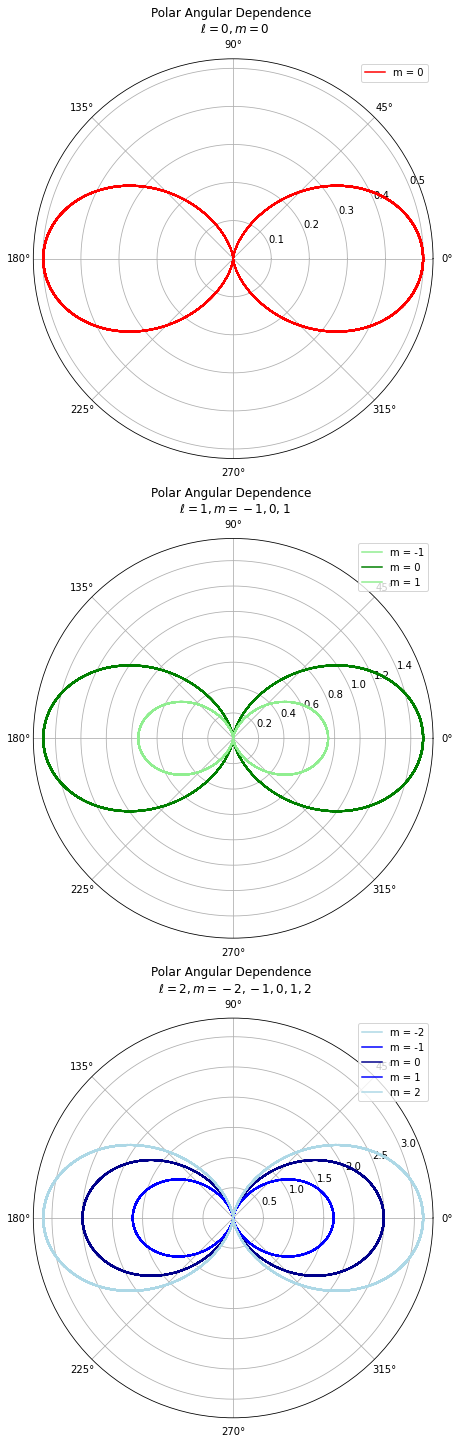

In [2]:
#Reimporting so that each module can be run individually
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import genlaguerre
from scipy.integrate import simps
from scipy.special import eval_legendre
import math
import scipy.special as special

#Defines theta
theta = np.arange(0,360,0.1)

def PolAngDep(n,l,m,theta):
    #Determines whether m is + or - and applies appropritate equation
    if m >= 0:
        y = ((-1)**m)*(((l+0.5)*((special.factorial(l-m))/(special.factorial(l+m))))**0.5)*(eval_legendre(m,l))*np.cos(theta)
    elif m < 0:
        m = abs(m)
        y = ((-1)**m)*((-1)**m)*(((l+0.5)*((special.factorial(l-m))/(special.factorial(l+m))))**0.5)*(eval_legendre(m,l))*np.cos(theta)
    Theta = y**2
    return Theta

#Creates figure
fig = plt.figure(figsize=(25,25))

#Setting y values for axis0, l=0
y01 = PolAngDep(1,0,0,theta)

#Plotting for axis0 - where 0 is axis 0
ax0 = fig.add_subplot(311,polar = True)
ax0.plot(theta,y01,color='red',label='m = 0')
ax0.set_title('Polar Angular Dependence \n $\ell=0, m=0$')
plt.legend()


#Setting y values for axis1, l=1
y11 = PolAngDep(2,1,-1,theta)
y12 = PolAngDep(2,1,0,theta)
y13 = PolAngDep(2,1,1,theta)

#Plotting for axis1 - where 1 is axis 1
ax1 = fig.add_subplot(312,polar = True)
ax1.plot(theta,y11,color='lightgreen',label='m = -1')
ax1.plot(theta,y12,color='green',label='m = 0')
ax1.plot(theta,y13,color='lightgreen',label='m = 1')
ax1.set_title('Polar Angular Dependence \n $\ell=1, m=-1,0,1$')
plt.legend()


#Setting y values for axis2, l=2
y21 = PolAngDep(3,2,-2,theta)
y22 = PolAngDep(3,2,-1,theta)
y23 = PolAngDep(3,2,0,theta)
y24 = PolAngDep(3,2,1,theta)
y25 = PolAngDep(3,2,2,theta)

#Plotting for axis2 - where 2 is axis 2
ax2 = fig.add_subplot(313,polar = True)
ax2.plot(theta,y21,color='lightblue',label='m = -2')
ax2.plot(theta,y22,color='blue',label='m = -1')
ax2.plot(theta,y23,color='darkblue',label='m = 0')
ax2.plot(theta,y24,color='blue',label='m = 1')
ax2.plot(theta,y25,color='lightblue',label='m = 2')
ax2.set_title('Polar Angular Dependence \n $\ell=2, m=-2,-1,0,1,2$')
plt.legend()

#Adjusts gap between graphs, purely aesthetic
fig.subplots_adjust(hspace=0.2)

#Saves figure as png
fig.savefig('PythonProjectLevel2Theta')

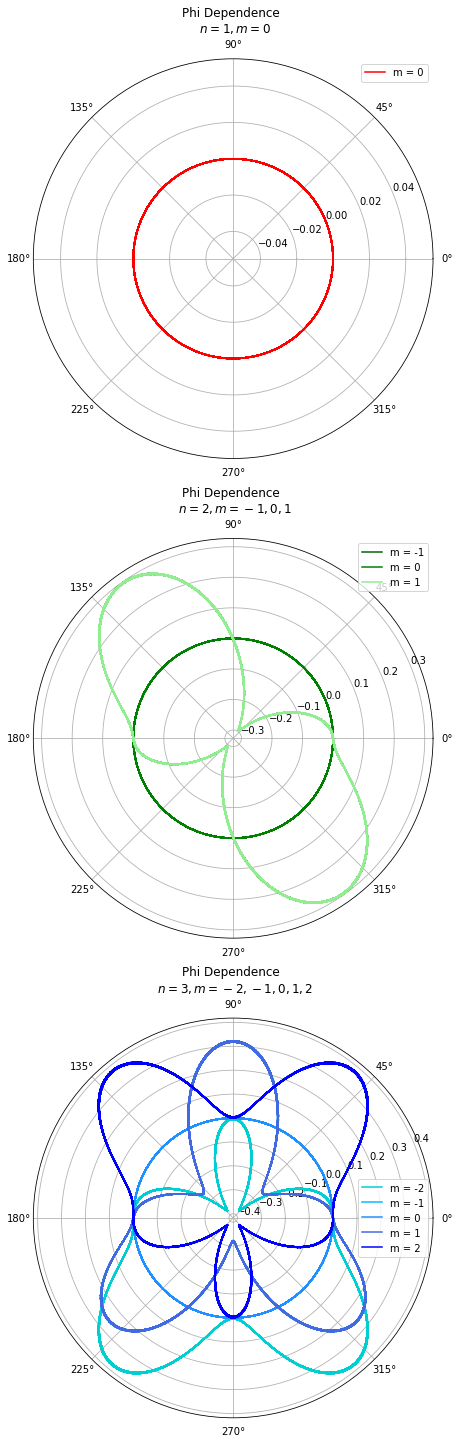

In [3]:
#Reimporting so that each module can be run individually
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import genlaguerre
from scipy.integrate import simps
from scipy.special import eval_legendre
import math
import scipy.special as special

#Defines phi
phi = np.arange(0,360,0.1)

#Creates new figure
fig1 = plt.figure(figsize=(25,25))

#Plotting for axis20 - where 2 is level 2 and 0 is axis 0
ax0phi = fig1.add_subplot(311,polar = True)
ax0phi.plot(phi,np.imag(special.sph_harm(0,1,theta,phi)),color='red',label='m = 0')
ax0phi.set_title('Phi Dependence \n $n=1, m=0$')
plt.legend()

#Plotting for axis21 - where 2 is level 2 and 1 is axis 1
ax1phi = fig1.add_subplot(312,polar = True)
ax1phi.plot(phi,np.imag(special.sph_harm(-1,2,theta,phi)),color='darkgreen',label='m = -1')
ax1phi.plot(phi,np.imag(special.sph_harm(0,2,theta,phi)),color='green',label='m = 0')
ax1phi.plot(phi,np.imag(special.sph_harm(1,2,theta,phi)),color='lightgreen',label='m = 1')
ax1phi.set_title('Phi Dependence \n $n=2, m=-1,0,1$')
plt.legend()

#Plotting for axis22 - where 2 is level 2 and 2 is axis 2
ax2phi = fig1.add_subplot(313,polar = True)
ax2phi.plot(phi,np.imag(special.sph_harm(-2,3,theta,phi)),color='darkturquoise',label='m = -2')
ax2phi.plot(phi,np.imag(special.sph_harm(-1,3,theta,phi)),color='deepskyblue',label='m = -1')
ax2phi.plot(phi,np.imag(special.sph_harm(0,3,theta,phi)),color='dodgerblue',label='m = 0')
ax2phi.plot(phi,np.imag(special.sph_harm(1,3,theta,phi)),color='royalblue',label='m = 1')
ax2phi.plot(phi,np.imag(special.sph_harm(2,3,theta,phi)),color='blue',label='m = 2')
ax2phi.set_title('Phi Dependence \n $n=3, m=-2,-1,0,1,2$')
plt.legend()

#Adjusts gap between graphs, purely aesthetic
fig1.subplots_adjust(hspace=0.2)

#Saves figure as png
fig1.savefig('PythonProjectLevel2Phi')

# Level 3

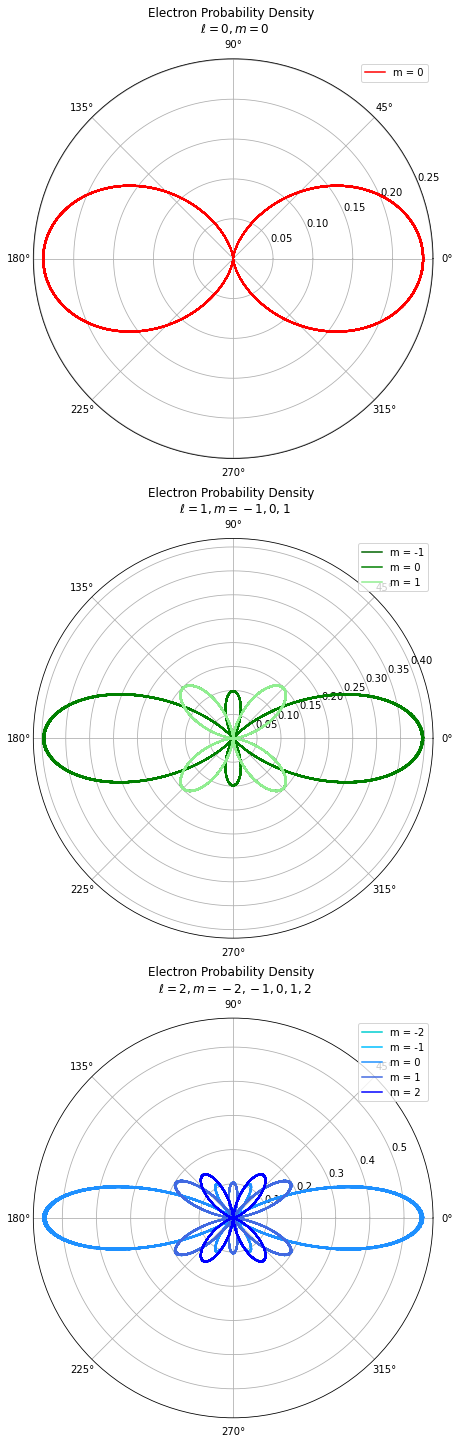

In [4]:
#Reimporting so that each module can be run individually
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import genlaguerre
from scipy.integrate import simps
from scipy.special import eval_legendre
import math
import scipy.special as special

#Removes complex number error messages, purely aesthetic, doesn't affect code
import warnings
warnings.filterwarnings("ignore")

#Defines phi, theta and radius (all equal but have different roles)
phi = np.arange(0,360,0.1)
theta = np.arange(0,360,0.1)
radius = np.arange(0,360,0.1)

#Creates figure
fig3 = plt.figure(figsize=(25,25))

#Setting y values for axis30, l=0
y301 = special.sph_harm(0,1,theta,phi)*np.conj(special.sph_harm(0,1,theta,phi))

#Plotting for axis30 - where 3 is level 3 and 0 is axis 0
ax30 = fig3.add_subplot(311,polar = True)
ax30.plot(radius,y301,color='red',label='m = 0')
ax30.set_title('Electron Probability Density \n $\ell=0, m=0$')
plt.legend()


#Setting y values for axis31, l=1
y311 = special.sph_harm(-1,2,theta,phi)*np.conj(special.sph_harm(-1,2,theta,phi))
y312 = special.sph_harm(0,2,theta,phi)*np.conj(special.sph_harm(0,2,theta,phi))
y313 = special.sph_harm(1,2,theta,phi)*np.conj(special.sph_harm(1,2,theta,phi))

#Plotting for axis31 - where 3 is level 3 and 1 is axis 1
ax31 = fig3.add_subplot(312,polar = True)
ax31.plot(radius,y311,color='darkgreen',label='m = -1')
ax31.plot(radius,y312,color='green',label='m = 0')
ax31.plot(radius,y313,color='lightgreen',label='m = 1')
ax31.set_title('Electron Probability Density \n $\ell=1, m=-1,0,1$')
plt.legend()


#Setting y values for axis32, l=2
y321 = special.sph_harm(-2,3,theta,phi)*np.conj(special.sph_harm(-2,3,theta,phi))
y322 = special.sph_harm(-1,3,theta,phi)*np.conj(special.sph_harm(-1,3,theta,phi))
y323 = special.sph_harm(0,3,theta,phi)*np.conj(special.sph_harm(0,3,theta,phi))
y324 = special.sph_harm(1,3,theta,phi)*np.conj(special.sph_harm(1,3,theta,phi))
y325 = special.sph_harm(2,3,theta,phi)*np.conj(special.sph_harm(2,3,theta,phi))

#Plotting for axis32 - where 3 is level 3 and 2 is axis 2
ax32 = fig3.add_subplot(313,polar = True)
ax32.plot(radius,y321,color='darkturquoise',label='m = -2')
ax32.plot(radius,y322,color='deepskyblue',label='m = -1')
ax32.plot(radius,y323,color='dodgerblue',label='m = 0')
ax32.plot(radius,y324,color='royalblue',label='m = 1')
ax32.plot(radius,y325,color='blue',label='m = 2')
ax32.set_title('Electron Probability Density \n $\ell=2, m=-2,-1,0,1,2$')
plt.legend()


#Adjusts gap between graphs, purely aesthetic
fig3.subplots_adjust(hspace=0.2)

#Saves figure as png
fig3.savefig('PythonProjectLevel3')